In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('IMDB-Movie-Data.csv')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
df.drop(columns = ['Title', 'Description', 'Director', 'Actors'], inplace=True)

In [4]:
df.head()

,Rank,Genre,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,"Action,Adventure,Sci-Fi",2014,121,8.1,757074,333.13,76.0
1,2,"Adventure,Mystery,Sci-Fi",2012,124,7.0,485820,126.46,65.0
2,3,"Horror,Thriller",2016,117,7.3,157606,138.12,62.0
3,4,"Animation,Comedy,Family",2016,108,7.2,60545,270.32,59.0
4,5,"Action,Adventure,Fantasy",2016,123,6.2,393727,325.02,40.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Year                1000 non-null   int64  
 3   Runtime (Minutes)   1000 non-null   int64  
 4   Rating              1000 non-null   float64
 5   Votes               1000 non-null   int64  
 6   Revenue (Millions)  872 non-null    float64
 7   Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 62.6+ KB


In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Genre               838 non-null    object 
 2   Year                838 non-null    int64  
 3   Runtime (Minutes)   838 non-null    int64  
 4   Rating              838 non-null    float64
 5   Votes               838 non-null    int64  
 6   Revenue (Millions)  838 non-null    float64
 7   Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 58.9+ KB


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

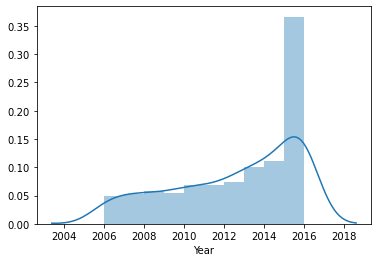

In [9]:
sns.distplot(df['Year'])   

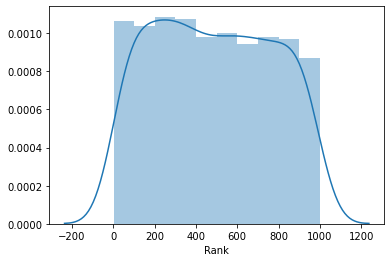

In [10]:
sns.distplot(df['Rank'])

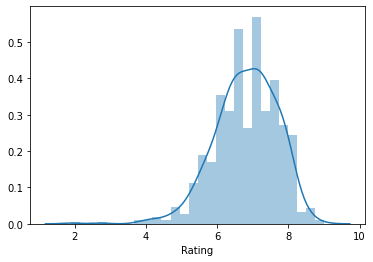

In [11]:
sns.distplot(df['Rating'])

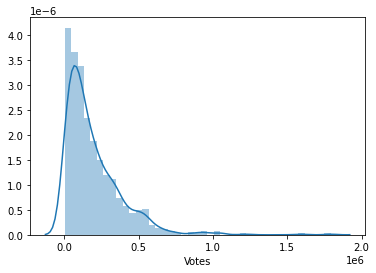

In [12]:
sns.distplot(df['Votes'])

In [13]:
df_genre = pd.concat([pd.Series(row['Rank'], row['Genre'].split(',')) for _, row in df.iterrows()]).reset_index()

In [14]:
df_genre.columns

Index(['index', 0], dtype='object')

In [15]:
df_genre.rename(columns={'index' : 'Genre_', 0:"Rank"}, inplace=True)

In [16]:
df_combined = pd.merge(df, df_genre, on='Rank', how='inner')

In [17]:
df_combined.drop('Genre', axis=1, inplace=True)

In [18]:
df_combined.head()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre_
0,1,2014,121,8.1,757074,333.13,76.0,Action
1,1,2014,121,8.1,757074,333.13,76.0,Adventure
2,1,2014,121,8.1,757074,333.13,76.0,Sci-Fi
3,2,2012,124,7.0,485820,126.46,65.0,Adventure
4,2,2012,124,7.0,485820,126.46,65.0,Mystery


In [19]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 0 to 2189
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                2190 non-null   int64  
 1   Year                2190 non-null   int64  
 2   Runtime (Minutes)   2190 non-null   int64  
 3   Rating              2190 non-null   float64
 4   Votes               2190 non-null   int64  
 5   Revenue (Millions)  2190 non-null   float64
 6   Metascore           2190 non-null   float64
 7   Genre_              2190 non-null   object 
dtypes: float64(3), int64(4), object(1)
memory usage: 154.0+ KB


In [20]:
columns = np.array([x for x in df_combined['Genre_'].unique()])
columns.reshape(-1,1)

array([['Action'],
       ['Adventure'],
       ['Sci-Fi'],
       ['Mystery'],
       ['Horror'],
       ['Thriller'],
       ['Animation'],
       ['Comedy'],
       ['Family'],
       ['Fantasy'],
       ['Drama'],
       ['Music'],
       ['Biography'],
       ['Romance'],
       ['History'],
       ['Western'],
       ['Crime'],
       ['War'],
       ['Musical'],
       ['Sport']], dtype='<U9')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score

In [22]:
one_hot = OneHotEncoder(handle_unknown='ignore').fit(columns.reshape(-1,1))
one_hot_encoded = pd.DataFrame(one_hot.transform(df_combined[['Genre_']]).toarray(), columns=one_hot.categories_)

In [23]:
one_hot_encoded

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2187,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
x = pd.concat([df_combined, one_hot_encoded], axis=1)
x.drop(columns='Genre_', inplace=True)

In [25]:
x.columns

Index([              'Rank',               'Year',  'Runtime (Minutes)',
                   'Rating',              'Votes', 'Revenue (Millions)',
                'Metascore',          ('Action',),       ('Adventure',),
             ('Animation',),       ('Biography',),          ('Comedy',),
                 ('Crime',),           ('Drama',),          ('Family',),
               ('Fantasy',),         ('History',),          ('Horror',),
                 ('Music',),         ('Musical',),         ('Mystery',),
               ('Romance',),          ('Sci-Fi',),           ('Sport',),
              ('Thriller',),             ('War',),         ('Western',)],
      dtype='object')

In [26]:
x = x.groupby(by = ['Rank', 'Year', 'Runtime (Minutes)', 'Votes', 'Revenue (Millions)', 'Metascore', 'Rating']).sum().reset_index()

In [27]:
X = x.drop(columns='Rating')
Y = x[['Rating']]

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=123)

####  Simple Linear Regression

In [29]:
slr = LinearRegression(normalize=True).fit(xtrain, ytrain)

In [30]:
slr.intercept_, slr.coef_

(array([-1.07019643]),
 array([[-1.37950833e-04,  2.69149264e-03,  7.16226718e-03,
          1.89724271e-06, -1.53826509e-03,  2.25562111e-02,
         -5.41373899e-02, -6.04026967e-03,  5.97326614e-01,
          2.00512241e-01,  1.35239140e-02,  5.17267185e-02,
          1.45092328e-01,  1.64778616e-01,  1.67913968e-02,
         -2.42872600e-02, -2.39387324e-01,  4.50025913e-01,
          9.54380982e-02,  1.45175399e-01,  4.36878358e-02,
         -5.74345566e-02,  2.23371602e-01,  7.23442124e-02,
          4.43579448e-01, -2.26800722e-01]]))

In [31]:
slr.score(xtest, ytest)

0.5995159627270739

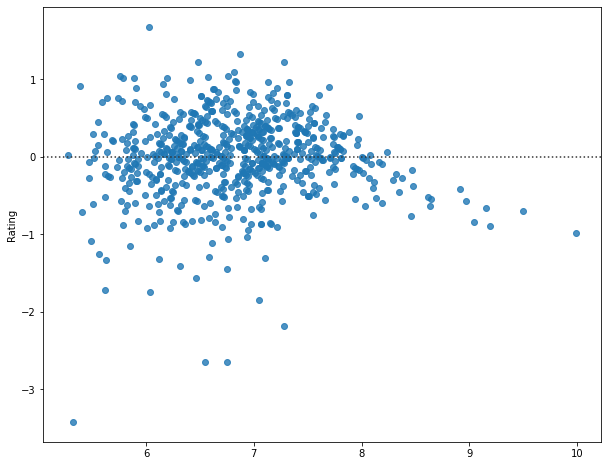

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
sns.residplot(slr.predict(xtrain), ytrain, label='train', ax = ax)

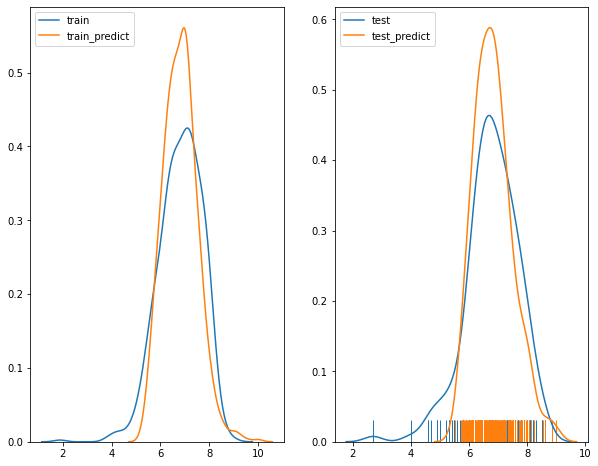

In [33]:
fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2 ,figsize=(10,8))
sns.distplot(ytrain, hist=False, ax=ax, label='train')
sns.distplot(slr.predict(xtrain), hist=False, ax=ax, label='train_predict')


sns.distplot(ytest, hist=False, ax=ax1, label='test', rug=True)
sns.distplot(slr.predict(xtest), hist=False, ax=ax1, rug=True, label='test_predict')

In [34]:
print(f'Mean Square Error (test) : {mean_squared_error(ytest, slr.predict(xtest))}')
print(f'Mean Square Error (train) : {mean_squared_error(ytrain, slr.predict(xtrain))}')

Mean Square Error (test) : 0.32714312762964987
Mean Square Error (train) : 0.27798924447053497


In [35]:
print('test data ', r2_score(ytest, slr.predict(xtest)))
print('train data : ', r2_score(ytrain, slr.predict(xtrain)))

test data  0.5995159627270739
train data :  0.6330339565342776


### polynomial regression

In [139]:
from sklearn.preprocessing import PolynomialFeatures 

In [140]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=123)

In [141]:
pl = PolynomialFeatures(degree=4).fit(xtrain)

In [142]:
xtrain = pl.transform(xtrain)
xtest = pl.transform(xtest)

In [143]:
plr = LinearRegression(normalize=True).fit(xtrain, ytrain)

In [144]:
ypred = plr.predict(xtest)

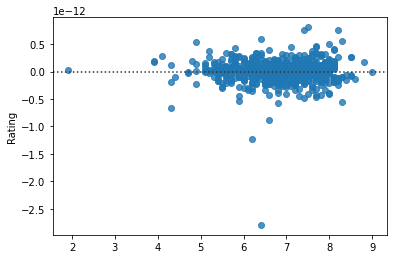

In [145]:
sns.residplot(plr.predict(xtrain), ytrain)

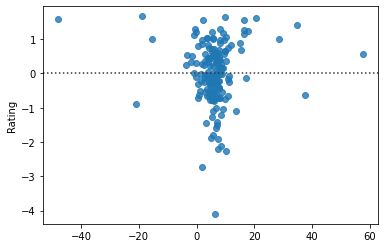

In [146]:
sns.residplot(plr.predict(xtest), ytest)

In [147]:
plr.score(xtest, ytest)

-86.37009623983663

In [148]:
plr.score(xtrain, ytrain)

1.0

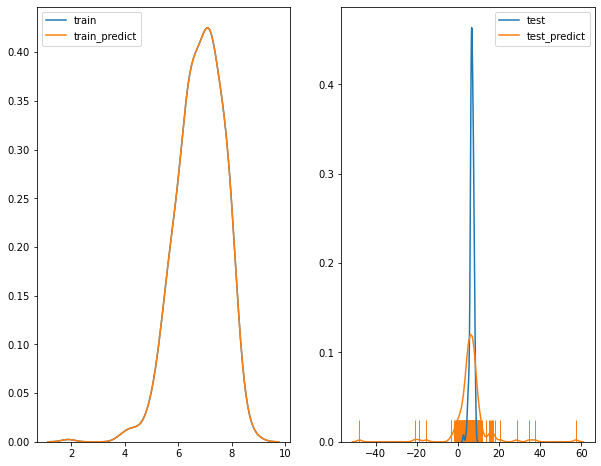

In [149]:
fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2 ,figsize=(10,8))
sns.distplot(ytrain, hist=False, ax=ax, label='train')
sns.distplot(plr.predict(xtrain), hist=False, ax=ax, label='train_predict')


sns.distplot(ytest, hist=False, ax=ax1, label='test', rug=True)
sns.distplot(plr.predict(xtest), hist=False, ax=ax1, rug=True, label='test_predict')

####  

#### Ridge Regression

In [161]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=123)

In [162]:
xtrain.shape, xtest.shape

((670, 26), (168, 26))

In [163]:
pl = PolynomialFeatures(degree=4).fit(xtrain)

In [164]:
xtrain = pl.transform(xtrain)
xtest = pl.transform(xtest)

In [165]:
rd = Ridge(alpha = 0.0001, normalize=True, random_state=123).fit(xtrain, ytrain)

In [166]:
rd.score(xtrain, ytrain), rd.score(xtest, ytest)

(0.9881634023012769, -14.303231505248789)

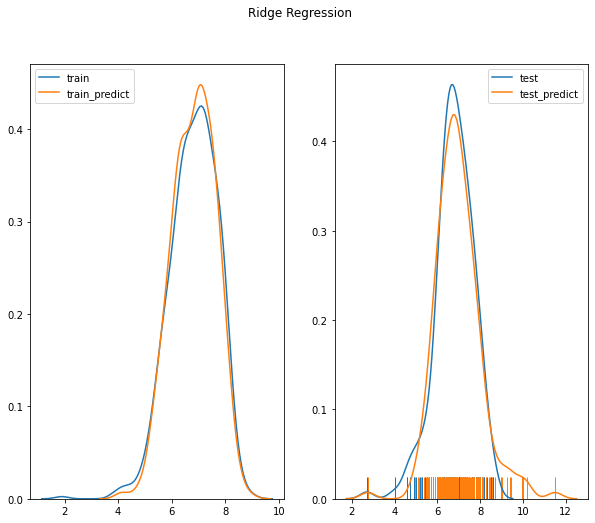

In [94]:
fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2 ,figsize=(10,8))

fig.suptitle('Ridge Regression')

sns.distplot(ytrain, hist=False, ax=ax, label='train')
sns.distplot(rd.predict(xtrain), hist=False, ax=ax, label='train_predict')


sns.distplot(ytest, hist=False, ax=ax1, label='test', rug=True)
sns.distplot(rd.predict(xtest), hist=False, ax=ax1, rug=True, label='test_predict')

In [73]:
print(f'Mean Square Error (test) : {mean_squared_error(ytest, rd.predict(xtest))}')
print(f'Mean Square Error (train) : {mean_squared_error(ytrain, rd.predict(xtrain))}')

Mean Square Error (test) : 0.5017417291972295
Mean Square Error (train) : 0.10771343048880774


### Lasso Regression

In [117]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=123)

In [56]:
lo = Lasso(alpha=0.0001, normalize=True, random_state=123).fit(xtrain, ytrain)

In [57]:
lo.score(xtrain, ytrain), lo.score(xtest, ytest)

(0.6327011254781643, 0.6009930940856458)

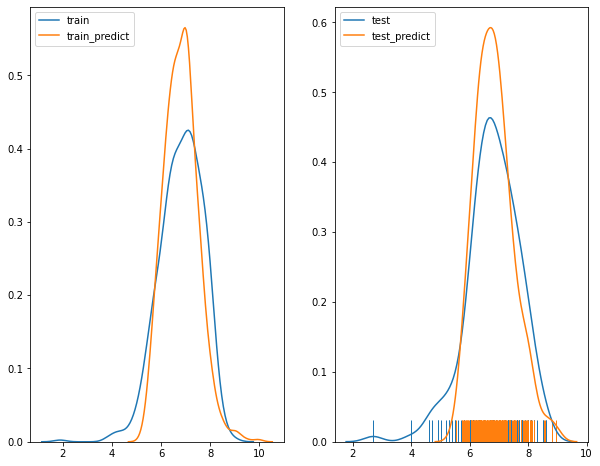

In [58]:
fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2 ,figsize=(10,8))
sns.distplot(ytrain, hist=False, ax=ax, label='train')
sns.distplot(lo.predict(xtrain), hist=False, ax=ax, label='train_predict')


sns.distplot(ytest, hist=False, ax=ax1, label='test', rug=True)
sns.distplot(lo.predict(xtest), hist=False, ax=ax1, rug=True, label='test_predict')

In [59]:
print(f'Mean Square Error (test) : {mean_squared_error(ytest, lo.predict(xtest))}')
print(f'Mean Square Error (train) : {mean_squared_error(ytrain, lo.predict(xtrain))}')

Mean Square Error (test) : 0.325936504324877
Mean Square Error (train) : 0.27824137530245463


## Elastic Regression

In [199]:
from sklearn.linear_model import ElasticNet

In [200]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=123)

In [201]:
el = ElasticNet(l1_ratio=0.8, alpha=0.0001, normalize=True, random_state=123)

In [202]:
el.fit(xtrain, ytrain)

ElasticNet(alpha=0.0001, l1_ratio=0.8, normalize=True, random_state=123)

In [203]:
el.score(xtest, ytest)

0.6007588213859688

In [204]:
el.score(xtrain, ytrain)

0.632460503887023

this model perform better than other model. further tuning this model using gridSearchCV and Cross validation score

In [205]:
from sklearn.model_selection import cross_val_score

In [207]:
cross_val_score(el, X, Y, cv=10).mean()

0.5530764200282382